# Import necessary libraries

In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report

# Read the CSV file and show its first rows

In [287]:
df = pd.read_csv('./survey-lung-cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Data Visualization
Let's explore the Dataset and see what's going on inisde it.

## Age distribution

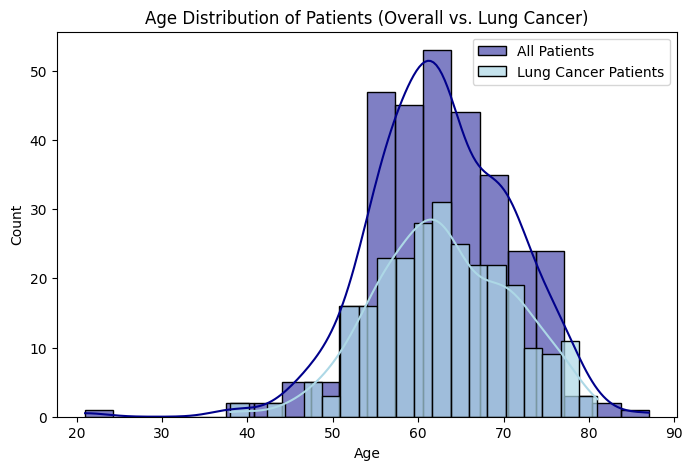

In [288]:
plt.figure(figsize=(8,5))
sns.histplot(df["AGE"], bins=20, kde=True, color="darkblue", label="All Patients", alpha=0.5)
sns.histplot(df[df["LUNG_CANCER"] == 'YES']["AGE"], bins=20, kde=True, color="lightblue", label="Lung Cancer Patients", alpha=0.7)
plt.title("Age Distribution of Patients (Overall vs. Lung Cancer)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()

plt.show()

In the figure above, the dark blue bars are showing the distribution of all patients in the dataset based on their age; the light blue bars are showing the distribution of patients with a positive lung cancer based on their age.

## Gender distribution

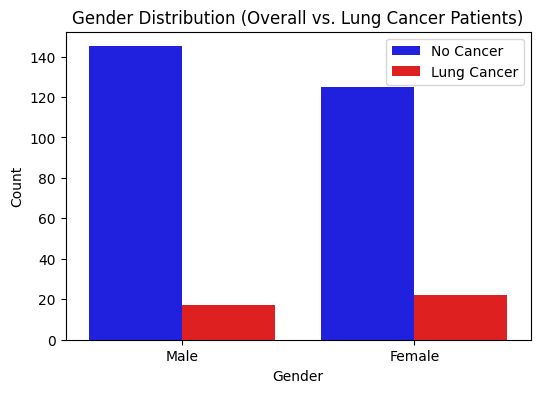

In [289]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["GENDER"].replace({"M": "Male", "F": "Female"}),  
hue=df["LUNG_CANCER"],  
palette=["blue", "red"])
plt.title("Gender Distribution (Overall vs. Lung Cancer Patients)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["No Cancer", "Lung Cancer"])

plt.show()

In the figure above, the blue bars are showing the distribution of all patients in the dataset based on their gender; the red bars are showing the distribution of patients with a positive lung cancer based on their gender.

## Distribution based on Alcohol consumption

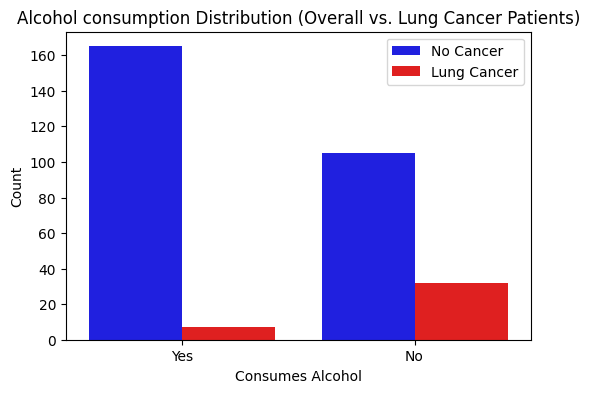

In [290]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["ALCOHOL CONSUMING"].replace({1: "No", 2: "Yes"}),
hue=df["LUNG_CANCER"],  
palette=["blue", "red"])
plt.title("Alcohol consumption Distribution (Overall vs. Lung Cancer Patients)")
plt.xlabel("Consumes Alcohol")
plt.ylabel("Count")
plt.legend(["No Cancer", "Lung Cancer"])

plt.show()

In the figure above, the blue bars are showing the distribution of all patients in the dataset based on whether they consume alcohol or not and the red bars are showing the distribution of patients with a positive lung cancer based on whether they consume alcohol or not.

## Mutual Information Score

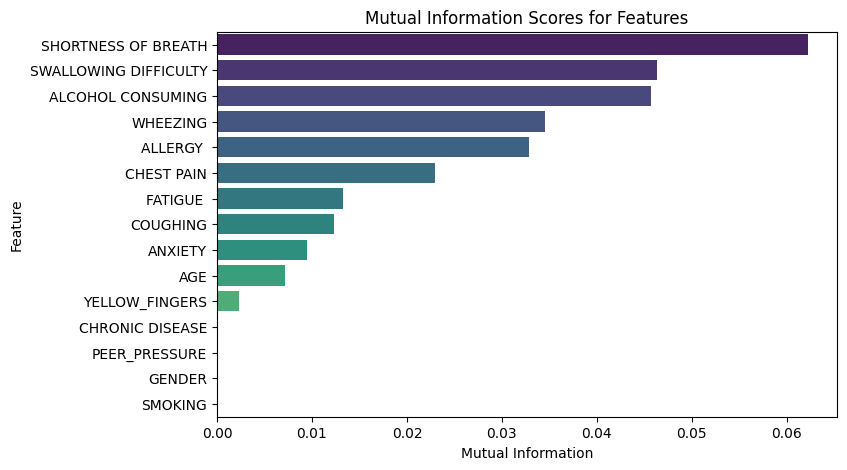

In [291]:
X_mi = df.copy()
X_mi.loc[df['GENDER'] == 'F', 'GENDER'] = 0
X_mi.loc[df['GENDER'] == 'M', 'GENDER'] = 1
X_mi = X_mi.drop(columns=["LUNG_CANCER"])
y_mi = df["LUNG_CANCER"]
mi_scores = mutual_info_classif(X_mi, y_mi, discrete_features="auto")
mi_df = pd.DataFrame({"Feature": X_mi.columns, "Mutual Information": mi_scores})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Mutual Information", y="Feature", data=mi_df, hue="Feature", palette="viridis", legend=False)
plt.title("Mutual Information Scores for Features")
plt.show()

This plot shows how much each feature is effective on the outcome.

***
# Data Cleaning and Preparation
In the above Data Frame we convert `GENDER` to a boolean type indicating `0` as `Female` and `1` as `Male`
as well as `LUNG_CANCER` to a boolean type indicating `0` as `No` and `1` as `Yes`

In [292]:
df.loc[df['LUNG_CANCER'] == 'YES', 'LUNG_CANCER'] = 1
df.loc[df['LUNG_CANCER'] == 'NO', 'LUNG_CANCER'] = 0

df.loc[df['GENDER'] == 'F', 'GENDER'] = 0
df.loc[df['GENDER'] == 'M', 'GENDER'] = 1

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


Let's see how many features and rows we have in the dataset.

In [293]:
df.shape

(309, 16)

So we have totally 309 rows with 16 columns

See how many people in the dataset have Lung Cancer and how many don't.

In [294]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

As we can see, 270 people in the dataset suffer from lung cancer and 39 people don't have such disease.

As the `LUNG_CANCER` is the column we need to predict it, we seperate it from the DataFrame into another variable. So `x` is our Features and `y` is our outputs.

In [295]:
x = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

In [296]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In the table above, see all the features except the last one which is `LUNG_CANCER`

In [297]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: object

And `y` contains only one feature which is `LUNG_CANCER`

For machine learning purposes, we convert the `x` and `y` to numpy arrays.

In [298]:
x = np.array(x)
y = np.array(y)
y = y.astype(int)

In [299]:
x

array([[1, 69, 1, ..., 2, 2, 2],
       [1, 74, 2, ..., 2, 2, 2],
       [0, 59, 1, ..., 2, 1, 2],
       ...,
       [1, 58, 2, ..., 1, 1, 2],
       [1, 67, 2, ..., 2, 1, 2],
       [1, 62, 1, ..., 1, 2, 1]], shape=(309, 15), dtype=object)

In [300]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

***
# Normalize

In this dataset, we don't necessarily need Normalization because most of our features are `boolean` features except for `AGE`, but for a better implementation we normalize the dataset.

In [301]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [302]:
x

array([[ 0.95257934,  0.77185028, -1.13529242, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [ 0.95257934,  1.38182914,  0.88083033, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-1.04978132, -0.44810745, -1.13529242, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       ...,
       [ 0.95257934, -0.57010322,  0.88083033, ..., -1.33558369,
        -0.94029056,  0.892475  ],
       [ 0.95257934,  0.52785873,  0.88083033, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [ 0.95257934, -0.08212013, -1.13529242, ..., -1.33558369,
         1.06350105, -1.12047956]], shape=(309, 15))

***
# Split to Train/Test
We split our DataFrame to training and testing DataFrames by a 80 to 20 percent ratio.

In [303]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

So `x_train` is our features for training, `x_test` is our features for testing, `y_train` is the training outputs and `y_test` is the test outputs.

In [304]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((247, 15), (62, 15), (247,), (62,))

***
# Meachine Learning Algorithms
From now on, we will try different ML algorithms on the data to find out which one fits better and has a better accuracy.

## Naive Bayes
Naive Bayes is a simple algorithm that predicts things by calculating the chances of an event happening based on past data, assuming all features are independent.

### Train the Model



In [305]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

### Performance

In [306]:
y_pred_test_NB = nb.predict(x_test)

report = classification_report(y_test, y_pred_test_NB)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.88      0.96      0.92        53

    accuracy                           0.85        62
   macro avg       0.69      0.59      0.61        62
weighted avg       0.82      0.85      0.83        62



### Visualize the model outcome

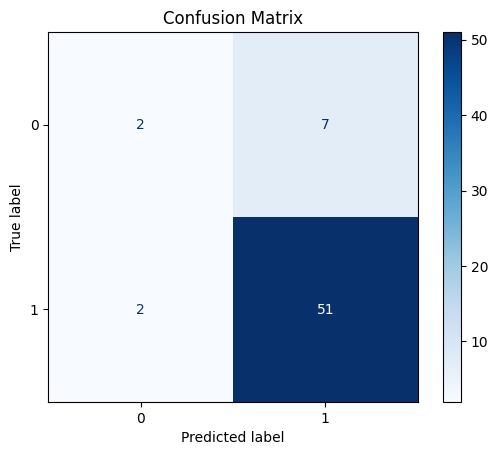

In [307]:
from sklearn.metrics import ConfusionMatrixDisplay
# Confusion matrix plot
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_NB, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

***
## KNN
K-Nearest Neighbors (KNN) is an algorithm that predicts a result by looking at the closest examples in the data and choosing the most common answer among them.

### Train the Model

In [308]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Performance

In [309]:
y_pred_test_knn = knn.predict(x_test)

report = classification_report(y_test, y_pred_test_knn)
print(report)

              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.89      0.92      0.91        53

    accuracy                           0.84        62
   macro avg       0.66      0.63      0.64        62
weighted avg       0.82      0.84      0.83        62



In [310]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test_knn)

array([[ 3,  6],
       [ 4, 49]])

### Visualize the model outcome

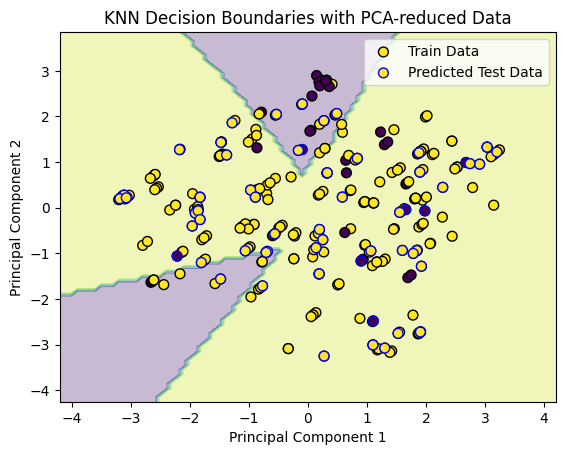

In [311]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)  # Apply PCA for dimensionality reduction
# Step 2: Apply PCA to test data as well
X_test_reduced = pca.transform(x_test)  # Apply the same PCA transformation to the test data

# Step 2: Create a meshgrid for the decision boundaries
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Step 3: Predict on each point in the meshgrid
Z = knn.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))  # Map the grid back to the original space
Z = Z.reshape(xx.shape)

# Step 4: Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)

# Step 5: Plot the training data (in the 2D PCA space)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, marker='o', label='Train Data', edgecolors='k', s=50)

# Step 6: Plot the test data (actual and predicted)
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred_test_knn, marker='o', label='Predicted Test Data', edgecolors='blue', s=50)

# Step 7: Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries with PCA-reduced Data')
plt.legend()
plt.show()

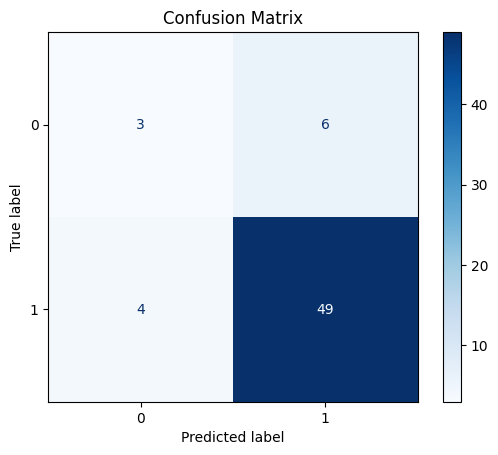

In [312]:
# Confusion matrix plot
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

***
## Random Forest
Random Forest is an algorithm that makes predictions by combining the results of many decision trees, improving accuracy and reducing errors.
### Train the Model

In [313]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

### Performance

In [314]:
y_pred_test_rf = rf.predict(x_test)

print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.88      0.96      0.92        53

    accuracy                           0.85        62
   macro avg       0.69      0.59      0.61        62
weighted avg       0.82      0.85      0.83        62



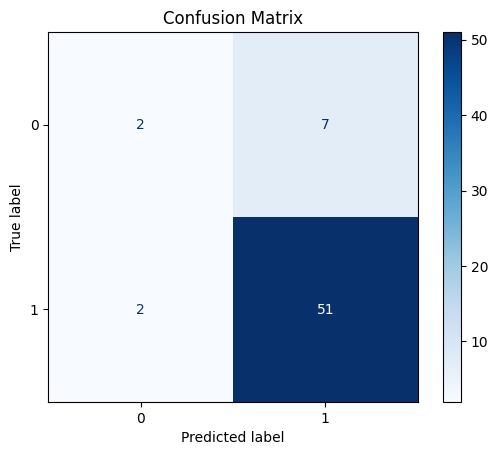

In [315]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

***
## Neural Network
A Neural Network (Multi-Layer Perceptron) is an algorithm that mimics how the human brain works, using layers of connected nodes (neurons) to learn patterns and make predictions.

### Train the Model

In [316]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=500, random_state=42)
mlp_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=500, random_state=42)

### Performance

In [317]:
y_pred_test_mlp = mlp_model.predict(x_test)

print(classification_report(y_test, y_pred_test_mlp))



              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.89      0.92      0.91        53

    accuracy                           0.84        62
   macro avg       0.66      0.63      0.64        62
weighted avg       0.82      0.84      0.83        62



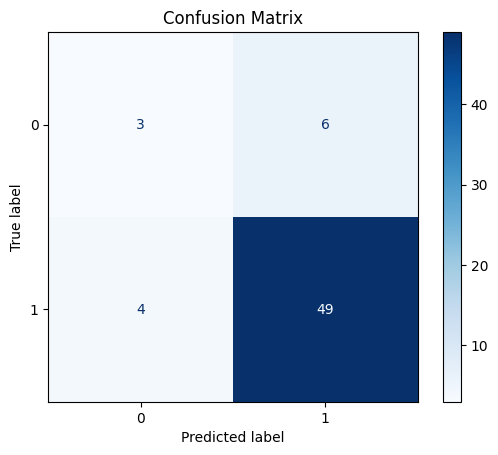

In [318]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_mlp, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

***
# Model Comparison

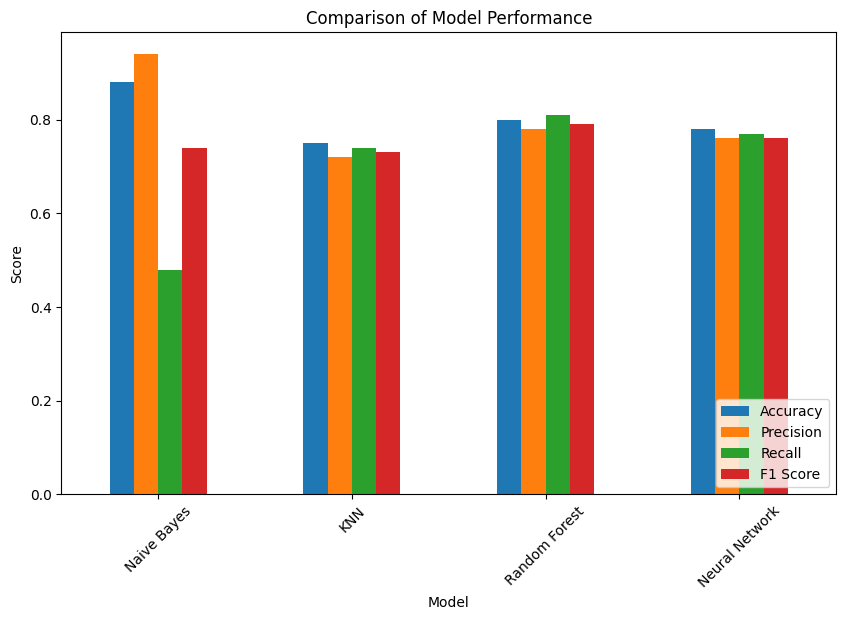

In [319]:
model_scores = {
    'Model': ['Naive Bayes', 'KNN', 'Random Forest', 'Neural Network'],
    'Accuracy': [0.88, 0.75, 0.80, 0.78],  # Replace with your actual scores
    'Precision': [0.94, 0.72, 0.78, 0.76],
    'Recall': [0.48, 0.74, 0.81, 0.77],
    'F1 Score': [0.74, 0.73, 0.79, 0.76]
}

df_scores = pd.DataFrame(model_scores)
df_scores.set_index('Model', inplace=True)

df_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

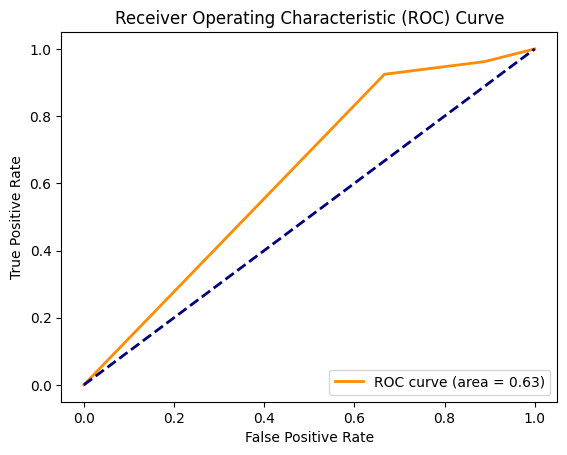

In [320]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = knn.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [321]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [322]:
importances = rf.feature_importances_  # For RandomForest or DecisionTree
features = df.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

ValueError: All arrays must be of the same length